<a href="https://colab.research.google.com/github/JUPUDI-VAMSI-KALYAN/Data_Science-Python-/blob/master/Toxic%20Comment%20Classification(Internship%20Minor%20Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving test_labels.csv to test_labels.csv
Saving train.csv to train.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [6]:
nrow_train = train.shape[0]
nrow_test=test.shape[0]
sum = nrow_train+nrow_test
print("      :train : test")
print("perc  :",round(nrow_train*100/sum),"    :",round(nrow_test*100/sum))

      :train : test
perc  : 51     : 49


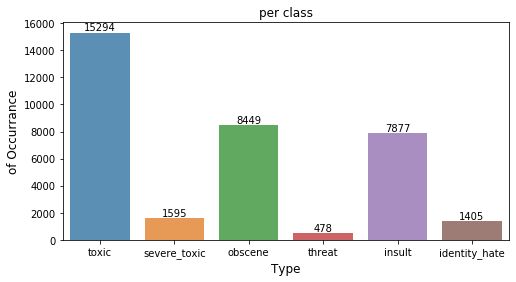

In [10]:
x = train.iloc[:,2:].sum()
plt.figure(figsize=(8,4))
ax=sns.barplot(x.index,x.values,alpha=0.8)
plt.title('per class')
plt.ylabel('of Occurrance',fontsize=12)
plt.xlabel('Type',fontsize=12)
rects=ax.patches
labels=x.values
for rect,labels in zip(rects, labels):
  height = rect.get_height()
  ax.text(rect.get_x()+rect.get_width()/2,height+5,labels,ha='center',va='bottom')

In [12]:
test[test['comment_text'].isnull()]

,id,comment_text


In [0]:
test.fillna('missing',inplace=True)

In [0]:
target_labels = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [0]:
def clean_text(text):
  text = re.sub(r"what's","what is",text)
  text = re.sub(r"\'s"," ",text)
  text = re.sub(r"\'ve"," have ",text)
  text = re.sub(r"can't","cannot",text)
  text = re.sub(r"n't"," not ",text)
  text = re.sub(r"i'm","i am ",text)
  text = re.sub(r"\'re"," are ",text)
  text = re.sub(r"\'d"," would ",text)
  text = re.sub(r"\'ll"," will ",text)
  text = re.sub(r"\'scuse"," excuse ",text)
  text = re.sub(r"\'w"," ",text)
  text = re.sub(r"\s+"," ",text)
  text = text.strip(' ')
  return text

In [0]:
cleaned_train_comment = []
for i in range(0,len(train)):
  cleaned_comment = clean_text(train['comment_text'][i])
  cleaned_train_comment.append(cleaned_comment)
train['comment_text'] = pd.Series(cleaned_train_comment).astype(str)

In [0]:
X = train.comment_text
test_X = test.comment_text

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=20000,min_df=2)

In [0]:
X_dtm = vect.fit_transform(X)

In [0]:
test_X_dtm = vect.transform(test_X)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(C=0.6)

In [31]:
for label in target_labels:
  print('processing {}'.format(label))
  y=train[label]
  logreg.fit(X_dtm, y)
  y_pred_X = logreg.predict(X_dtm)
  print("Training accuracy is {}".format(accuracy_score(y,y_pred_X)))
  test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]
  sub[label] = test_y_prob

processing toxic


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy is 0.9595540543081136
processing severe_toxic
Training accuracy is 0.9909820706770027
processing obscene
Training accuracy is 0.9780348559575361
processing threat
Training accuracy is 0.9973115415708368
processing insult
Training accuracy is 0.9725075358304454
processing identity_hate
Training accuracy is 0.992160229615657


In [0]:
sub.to_csv('submission_toxicLR.csv',index=False)